In [115]:
# Imports :
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [116]:
df = pd.read_table('horse_data23.txt')
class_names = np.unique(df['lameLeg'])
y = df['lameLeg']
# here the diagonal classes have been combined
c  =  np.array(pd.get_dummies(y)) @ np.array([1,2,3,2,1])

### **3. CLASSIFICATION WITH RESPECT TO DIAGONAL ELEMENTS**

In [117]:
X1 = df[['A', 'W']]
X1.Name = 'X1'
X2 = df[['pc3', 'pc4']]
X2.Name = 'X2'
X3 = df[['S', 'W', 'pc3', 'pc4']]
X3.Name = 'X3'

dataset = [X1, X2, X3]

In [118]:
# test withh standardization

np.random.seed(0)

save_accuracy = np.zeros((3,8,3))


for k, data in enumerate(dataset):
    #if (k == 2): continue
    n_estimators = [10,50,100,300,300,500,1000]
    saved_estimators = np.zeros(8)

    print_running_accuracy = False

    LogisticModel_accuracy = np.zeros(8)
    RandomForest_accuracy = np.zeros(8)
    Baseline_accuracy = np.zeros(8)

    N_test = np.zeros(8)

    # cross-validation loop for each horse
    for i in range(8):
        RandomForest_accuracy_inner = np.zeros(7)
        # printing
        print("CV-loop: " + str(i+1)) if print_running_accuracy else print("CV-loop: " + str(i+1), end = '\r') 
        # indexing
        array_inner = np.delete(np.unique(df['horse']),i)
        index_test = df['horse'] == np.unique(df['horse'])[i]
        index_train = df['horse'] != np.unique(df['horse'])[i]
        index_test = index_test.to_numpy()
        index_train = index_train.to_numpy()

        # splitting the data
        X_train, y_train = data[index_train], c[index_train]
        X_test, y_test = data[index_test], c[index_test]
        N_test[i], _ = np.shape(X_train)

        X_train = X_train.to_numpy()
        X_test = X_test.to_numpy()

        # standardization
        mu = np.mean(X_train)
        sd = np.std(X_train)
        X_train = (X_train - mu)/sd
        X_test = (X_test - mu)/sd

        for j in range(7):
            index_test_inner = df['horse'] == array_inner[j]
            index_train_inner = df['horse'] != array_inner[j]

            # splitting the data
            X_train_inner, y_train_inner = data[index_train_inner], c[index_train_inner]
            X_test_inner, y_test_inner = data[index_test_inner], c[index_test_inner]
            RandomForestModelInner = RandomForestClassifier(n_estimators=n_estimators[j])
            RandomForestModelInner.fit(X_train_inner, y_train_inner)
            RandomForest_y_predInner = RandomForestModelInner.predict(X_test_inner)
            RandomForest_accuracy_inner[j] = sum(RandomForest_y_predInner == y_test_inner)/len(y_test_inner)

        # baseline
        _, counts = np.unique(y_train, return_counts=True)
        Baseline_y_pred = np.argmax(counts) + 1
        Baseline_accuracy[i] =  sum(y_test == Baseline_y_pred)/len(y_test)
        if print_running_accuracy: print("Baseline's accuracy:", Baseline_accuracy[i])

        # logistic
        LogisticModel = LogisticRegression()
        LogisticModel.fit(X_train, y_train)
        Logistic_y_pred = LogisticModel.predict(X_test)
        LogisticModel_accuracy[i] = sum(Logistic_y_pred == y_test)/len(y_test)
        if print_running_accuracy: print("LogisticModel's accuracy:", LogisticModel_accuracy[i])

        # randomforest
        RandomForestModel = RandomForestClassifier(n_estimators=n_estimators[np.argmax(RandomForest_accuracy_inner)])
        saved_estimators[i] = n_estimators[np.argmax(RandomForest_accuracy_inner)]
        RandomForestModel.fit(X_train, y_train)
        RandomForest_y_pred = RandomForestModel.predict(X_test)
        RandomForest_accuracy[i] = sum(RandomForest_y_pred == y_test)/len(y_test)
        if print_running_accuracy: print("RandomForestModel's accuracy:", RandomForest_accuracy[i])
    print("--------------------------------------")
    print("--------------------------------------")
    print("Dataset: ", data.Name)
    print("--------------------------------------")
    print("The mean accuracy for Baseline: ", np.mean(Baseline_accuracy))
    print("The mean accuracy for LogisticModel: ", np.mean(LogisticModel_accuracy))
    print("The mean accuracy for RandomForestModel: ", np.mean(RandomForest_accuracy))
    print("--------------------------------------")
    print("The weighted mean accuracy for Baseline: ", np.mean(Baseline_accuracy * N_test/85))
    print("The weighted mean accuracy for LogisticModel: ", np.mean(LogisticModel_accuracy*N_test/85))
    print("The weighted mean accuracy for RandomForestModel: ", np.mean(RandomForest_accuracy*N_test/85))
    print("--------------------------------------")
    print("Chosen n-estimators in random tree model:")
    print(saved_estimators)

    save_accuracy[k, :, 0] = Baseline_accuracy
    save_accuracy[k, :, 1] = LogisticModel_accuracy
    save_accuracy[k, :, 2] = RandomForest_accuracy


--------------------------------------
--------------------------------------
Dataset:  X1
--------------------------------------
The mean accuracy for Baseline:  0.3626068376068376
The mean accuracy for LogisticModel:  0.8717948717948718
The mean accuracy for RandomForestModel:  0.877457264957265
--------------------------------------
The weighted mean accuracy for Baseline:  0.3184891905480141
The weighted mean accuracy for LogisticModel:  0.7644419306184014
The weighted mean accuracy for RandomForestModel:  0.7701043237807944
--------------------------------------
Chosen n-estimators in random tree model:
[300. 300. 300. 300.  10.  10. 100.  10.]
--------------------------------------
--------------------------------------
Dataset:  X2
--------------------------------------
The mean accuracy for Baseline:  0.3626068376068376
The mean accuracy for LogisticModel:  0.8208333333333333
The mean accuracy for RandomForestModel:  0.806517094017094
--------------------------------------
The 

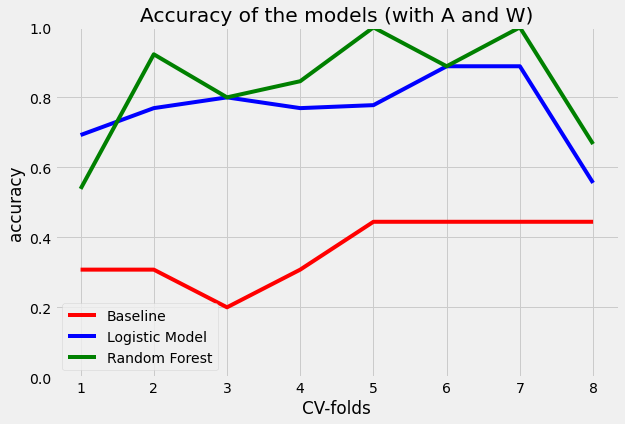

In [12]:
plt.figure(figsize=(9,6))
x = [i+1 for i in range(8)]
plt.plot(x,Baseline_accuracy, 'r-', label = "Baseline") #can be 'r--', 'bs', 'g^'
plt.plot(x,LogisticModel_accuracy, 'b-', label = "Logistic Model") #can be 'r--', 'bs', 'g^'
plt.plot(x,RandomForest_accuracy, 'g-', label = "Random Forest") #can be 'r--', 'bs', 'g^'
plt.ylabel('accuracy')
plt.xlabel('CV-folds')
plt.title('Accuracy of the models (with A and W)')
plt.legend()
plt.ylim((0,1))
#plt.savefig('picture/acc_1.jpg', bbox_inches="tight")
plt.show()

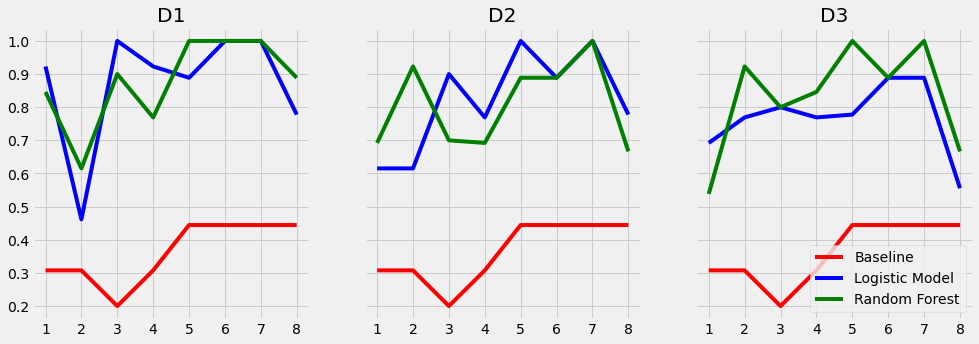

In [119]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5), sharey='row')
title = ["D1", "D2", "D3"]


x = [i+1 for i in range(8)]
for i in range(3):
    axs[i].plot(x,save_accuracy[i,:,0], 'r-', label = "Baseline") #can be 'r--', 'bs', 'g^'
    axs[i].plot(x,save_accuracy[i,:,1], 'b-', label = "Logistic Model") #can be 'r--', 'bs', 'g^'
    axs[i].plot(x,save_accuracy[i,:,2], 'g-', label = "Random Forest") #can be 'r--', 'bs', 'g^'
    axs[i].set_title(title[i])
    axs[i].set_xticks([i+1 for i in range(8)])
#ax1.ylabel('accuracy'
#plt.xlabel('CV-folds')
##plt.title('Accuracy of the models (with A and W)')
plt.legend(loc = "lower right")


#plt.savefig('picture/acc_1.jpg', bbox_inches="tight")
plt.show()

In [120]:
save_accuracy
# [dataset, cross_validation_loop, model]

array([[[0.30769231, 0.92307692, 0.84615385],
        [0.30769231, 0.46153846, 0.61538462],
        [0.2       , 1.        , 0.9       ],
        [0.30769231, 0.92307692, 0.76923077],
        [0.44444444, 0.88888889, 1.        ],
        [0.44444444, 1.        , 1.        ],
        [0.44444444, 1.        , 1.        ],
        [0.44444444, 0.77777778, 0.88888889]],

       [[0.30769231, 0.61538462, 0.69230769],
        [0.30769231, 0.61538462, 0.92307692],
        [0.2       , 0.9       , 0.7       ],
        [0.30769231, 0.76923077, 0.69230769],
        [0.44444444, 1.        , 0.88888889],
        [0.44444444, 0.88888889, 0.88888889],
        [0.44444444, 1.        , 1.        ],
        [0.44444444, 0.77777778, 0.66666667]],

       [[0.30769231, 0.69230769, 0.53846154],
        [0.30769231, 0.76923077, 0.92307692],
        [0.2       , 0.8       , 0.8       ],
        [0.30769231, 0.76923077, 0.84615385],
        [0.44444444, 0.77777778, 1.        ],
        [0.44444444, 0.8888888

### Decision Boundaries

In [97]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression

In [98]:
X_test = X2.to_numpy()
X_test = (X_test - np.mean(X_test))/(np.std(X_test))
X_test[1:5,:]

array([[ 0.38843502,  1.16839413],
       [ 0.0410581 ,  0.29954446],
       [ 0.25392602,  1.19645143],
       [ 0.14834355, -1.15044475]])

In [99]:
x0, x1 = np.meshgrid(
    np.linspace(X_test[:,0].min(), X_test[:,0].max(), 500).reshape(-1, 1),
    np.linspace(X_test[:,1].min(), X_test[:,1].max(), 500).reshape(-1, 1)
)

In [100]:
X_new = np.c_[x0.ravel(), x1.ravel()]
y_pred = LogisticModel.predict(X_new)

name = ["none", "diag_2","diag_1", "none"]

zz = y_pred.reshape(x0.shape)

formatter = plt.FuncFormatter(lambda i, *args: name[int(i)])

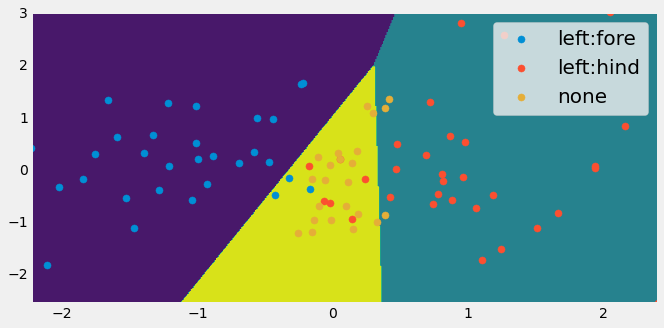

In [113]:
#custom_cmap = ListedColormap(["orange", "cyan", "cornflowerblue"])
#custom_cmap = ListedColormap(['#b4a7d6','#93c47d','#fff2cc'])


plt.figure(figsize=(10, 5))
cc = plt.contourf(x0, x1, zz)#, cmap=custom_cmap)
for i in range(3):
    index = i+1 == c
    plt.scatter(X_test[index, 0], X_test[index, 1], s = 50, label = class_names[i])
plt.legend(prop = {"size":20})

#plt.savefig('picture/dec_boun_12.jpg', bbox_inches="tight")
plt.grid()
plt.show()

/var/folders/k7/4m0jgf1s5rggf6q996sfswf00000gn/T/ipykernel_32567/3331227223.py:20: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar(ticks = [0,1,2,3],format=formatter)


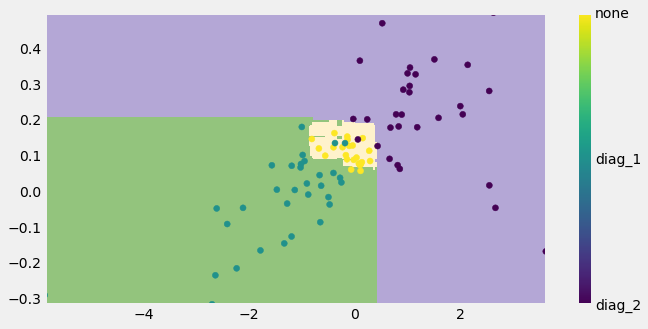

In [81]:
X_test = X1.to_numpy()
X_test = (X_test - np.mean(X_test))/(np.std(X_test))
X_test[1:5,:]

x0, x1 = np.meshgrid(
    np.linspace(X_test[:,0].min(), X_test[:,0].max(), 500).reshape(-1, 1),
    np.linspace(X_test[:,1].min(), X_test[:,1].max(), 500).reshape(-1, 1)
)

X_new = np.c_[x0.ravel(), x1.ravel()]
y_pred = RandomForestModel.predict(X_new)

zz = y_pred.reshape(x0.shape)

custom_cmap = ListedColormap(['#b4a7d6','#93c47d','#fff2cc'])

plt.figure(figsize=(10, 5))
plt.contourf(x0, x1, zz, cmap=custom_cmap)
plt.scatter(X_test[:,0], X_test[:,1], c=c)
plt.colorbar(ticks = [0,1,2,3],format=formatter)
plt.savefig('picture/dec_boun_22.jpg', bbox_inches="tight")
plt.show()

In [6]:


#iris = load_iris()

#x_index = 0
#y_index = 1
#formatter = plt.FuncFormatter(lambda i, *args: iris.target_names[int(i)])

#lr = LogisticRegression(multi_class='multinomial', random_state=42, max_iter=500)
#lr.fit(iris.data[:, [0, 1]], iris.target)







plt.colorbar(ticks=[0, 1, 2], format=formatter)

plt.xlabel(iris.feature_names[x_index])
plt.ylabel(iris.feature_names[y_index])

plt.tight_layout()
plt.show()

In [142]:
save_accuracy[0,:,:]

array([[0.30769231, 0.92307692, 0.84615385],
       [0.30769231, 0.46153846, 0.61538462],
       [0.2       , 1.        , 0.9       ],
       [0.30769231, 0.92307692, 0.76923077],
       [0.44444444, 0.88888889, 1.        ],
       [0.44444444, 1.        , 1.        ],
       [0.44444444, 1.        , 1.        ],
       [0.44444444, 0.77777778, 0.88888889]])

In [144]:
save_reform = np.zeros((8,9))

save_reform[:,0:3]= save_accuracy[0,:,:]
save_reform[:,3:6]= save_accuracy[1,:,:]
save_reform[:,6:9]= save_accuracy[2,:,:]
save_reform

array([[0.30769231, 0.92307692, 0.84615385, 0.30769231, 0.61538462,
        0.69230769, 0.30769231, 0.69230769, 0.53846154],
       [0.30769231, 0.46153846, 0.61538462, 0.30769231, 0.61538462,
        0.92307692, 0.30769231, 0.76923077, 0.92307692],
       [0.2       , 1.        , 0.9       , 0.2       , 0.9       ,
        0.7       , 0.2       , 0.8       , 0.8       ],
       [0.30769231, 0.92307692, 0.76923077, 0.30769231, 0.76923077,
        0.69230769, 0.30769231, 0.76923077, 0.84615385],
       [0.44444444, 0.88888889, 1.        , 0.44444444, 1.        ,
        0.88888889, 0.44444444, 0.77777778, 1.        ],
       [0.44444444, 1.        , 1.        , 0.44444444, 0.88888889,
        0.88888889, 0.44444444, 0.88888889, 0.88888889],
       [0.44444444, 1.        , 1.        , 0.44444444, 1.        ,
        1.        , 0.44444444, 0.88888889, 1.        ],
       [0.44444444, 0.77777778, 0.88888889, 0.44444444, 0.77777778,
        0.66666667, 0.44444444, 0.55555556, 0.66666667]])

In [147]:
# save data to txt
accucary_A_W = pd.DataFrame(save_reform, columns=["Base1", "Log1", "Rand1","Base2", "Log2", "Rand2","Base3", "Log3", "Rand3"])
#
accucary_A_W.to_csv('data/accuracy_of_models_class_3.csv')#, header=None, index=None, sep=' ', mode='a')
accucary_A_W

,Base1,Log1,Rand1,Base2,Log2,Rand2,Base3,Log3,Rand3
0,0.307692,0.923077,0.846154,0.307692,0.615385,0.692308,0.307692,0.692308,0.538462
1,0.307692,0.461538,0.615385,0.307692,0.615385,0.923077,0.307692,0.769231,0.923077
2,0.200000,1.000000,0.900000,0.200000,0.900000,0.700000,0.200000,0.800000,0.800000
3,0.307692,0.923077,0.769231,0.307692,0.769231,0.692308,0.307692,0.769231,0.846154
4,0.444444,0.888889,1.000000,0.444444,1.000000,0.888889,0.444444,0.777778,1.000000
5,0.444444,1.000000,1.000000,0.444444,0.888889,0.888889,0.444444,0.888889,0.888889
6,0.444444,1.000000,1.000000,0.444444,1.000000,1.000000,0.444444,0.888889,1.000000
7,0.444444,0.777778,0.888889,0.444444,0.777778,0.666667,0.444444,0.555556,0.666667
